<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-1K/blob/main/Car_Tyres_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Importing the necessary libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 2. Advanced visualization tools

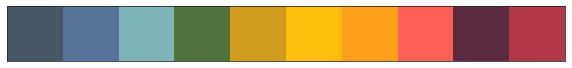

In [70]:
#color palette for this notebook
colors = ["#495867","#577399","#7CB4B8","#50723C","#D19C1D","#FFBE0B","#FF9F1C","#FE5F55","#5D2A42","#b23a48"]
palette = sns.color_palette(palette = colors)
sns.palplot(palette, size =1)
plt.show()

## Uploading and reading the dataset

In [71]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/Car_Tyres_Dataset.csv'
df = pd.read_csv(url,error_bad_lines=False)

df.head(10)

,Brand,Model,Submodel,Tyre Brand,Serial No.,Type,Load Index,Size,Selling Price,Original Price,Rating
0,Maruti,Swift Dzire,LDI (Diesel),JKTyre,Taximaxx,Tubeless,85,165/80 R 14,"3,255","3,255",5.0
1,Maruti,Swift Dzire,LDI (Diesel),CEAT,Milage X3,Tubeless,85,165/80 R 14,"3,406","3,406",4.0
2,Maruti,Swift Dzire,LDI (Diesel),Apollo,Amazer 4G Life,Tubeless,85,165/80 R 14,"3,490","4,319",4.5
3,Maruti,Swift Dzire,LDI (Diesel),Continental,Comfort Contact CC6,Tubeless,85,165/80 R 14,"4,484","4,244",NaN
4,Maruti,Swift Dzire,LDI (Diesel),GoodYear,Assurance Duraplus 2,Tubeless,85,165/80 R 14,"3,025","3,025",4.2
5,Maruti,Swift Dzire,LDI (Diesel),JKTyre,Tornado,Tubeless,85,165/80 R 14,"3,103","3,103",4.3
6,Maruti,Swift Dzire,LDI (Diesel),Firestone,FR500,Tubeless,85,165/80 R 14,"3,135","3,135",NaN
7,Maruti,Swift Dzire,LDI (Diesel),JKTyre,Elanzo Touring,Tubeless,85,165/80 R 14,"3,255","3,255",4.1
8,Maruti,Swift Dzire,LDI (Diesel),BridgeStone,B-Series B290,Tubeless,85,165/80 R 14,"4,250","4,250",3.7
9,Maruti,Swift Dzire,LDI (Diesel),BridgeStone,Turanza T005,Tubeless,85,165/80 R 14,"4,272","4,272",3.8


## 4. Data Exploration

In [72]:
df_row_count, df_column_count = df.shape
print('Total number of rows:', df_row_count)
print('Total number of columns:', df_column_count)

Total number of rows: 4350
Total number of columns: 11


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4350 entries, 0 to 4349
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           4350 non-null   object 
 1   Model           4350 non-null   object 
 2   Submodel        4350 non-null   object 
 3   Tyre Brand      4350 non-null   object 
 4   Serial No.      4350 non-null   object 
 5   Type            4350 non-null   object 
 6   Load Index      4350 non-null   int64  
 7   Size            4350 non-null   object 
 8   Selling Price   4350 non-null   object 
 9   Original Price  4350 non-null   object 
 10  Rating          2248 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 374.0+ KB


In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Load Index,4350.0,84.101609,6.716769,69.0,79.0,86.0,88.0,106.0
Rating,2248.0,4.297598,0.698433,1.9,4.0,4.3,5.0,5.0


## 5. Null Removable

In [75]:
df.isna().sum()

Brand                0
Model                0
Submodel             0
Tyre Brand           0
Serial No.           0
Type                 0
Load Index           0
Size                 0
Selling Price        0
Original Price       0
Rating            2102
dtype: int64

In [76]:
df.columns = df.columns.str.replace('[#,@,&,,]', '')

In [77]:
#replace NaN values
df=df.fillna(0)
df.iloc[:5]

,Brand,Model,Submodel,Tyre Brand,Serial No.,Type,Load Index,Size,Selling Price,Original Price,Rating
0,Maruti,Swift Dzire,LDI (Diesel),JKTyre,Taximaxx,Tubeless,85,165/80 R 14,"3,255","3,255",5.0
1,Maruti,Swift Dzire,LDI (Diesel),CEAT,Milage X3,Tubeless,85,165/80 R 14,"3,406","3,406",4.0
2,Maruti,Swift Dzire,LDI (Diesel),Apollo,Amazer 4G Life,Tubeless,85,165/80 R 14,"3,490","4,319",4.5
3,Maruti,Swift Dzire,LDI (Diesel),Continental,Comfort Contact CC6,Tubeless,85,165/80 R 14,"4,484","4,244",0.0
4,Maruti,Swift Dzire,LDI (Diesel),GoodYear,Assurance Duraplus 2,Tubeless,85,165/80 R 14,"3,025","3,025",4.2


In [78]:
print ("Unique values are:\n")
print(df.nunique())

Unique values are:

Brand               1
Model              34
Submodel          178
Tyre Brand         16
Serial No.        114
Type                2
Load Index         27
Size               47
Selling Price     368
Original Price    371
Rating             23
dtype: int64


In [79]:
# count of products by Resolution
df['Model'].groupby(df['Type']).count().sort_values(ascending=False)

Type
Tubeless    4061
Tube         289
Name: Model, dtype: int64

## 6. Data Visualization

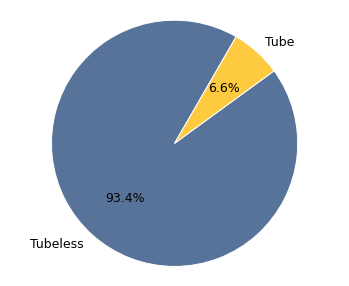

In [80]:
# Tyre Type distribution
labels = 'Tubeless', 'Tube'
sizes = [4061,289]
fig, ax = plt.subplots(figsize=(6, 5))
fig.set_facecolor('white')
ax.pie(sizes, labels=labels, colors=["#577399","#FDCA40"],autopct='%1.1f%%',startangle=60,textprops={'color':'black','fontsize':12.5})
ax.axis('equal')
plt.show()

In [81]:
# count of products by Resolution
df['Model'].groupby(df['Tyre Brand']).count().sort_values(ascending=False)

Tyre Brand
BridgeStone    610
GoodYear       501
CEAT           449
JKTyre         445
Apollo         400
Yokohama       379
Continental    339
Falken         269
MRF            263
Firestone      171
UltraMile      149
Michelin       130
Pirelli        104
Hankook         65
Kumho           57
Maxxis          19
Name: Model, dtype: int64

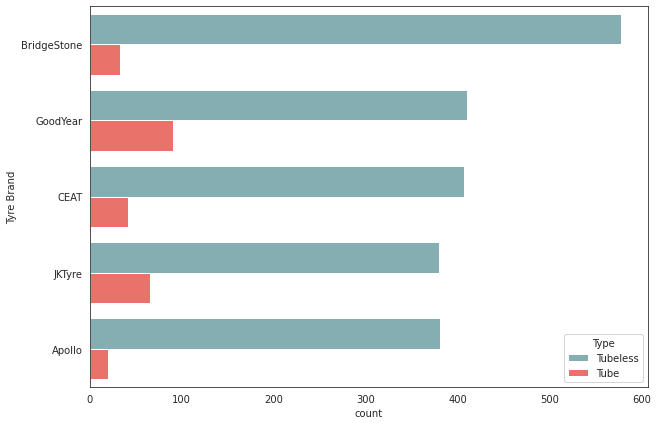

In [82]:
sns.set_style('white')
plt.figure(figsize=(10,7))
sns.countplot(y="Tyre Brand", hue="Type", data=df, palette=["#7CB4B8","#FE5F55"],order=df["Tyre Brand"].value_counts().iloc[:5].index)
plt.show()

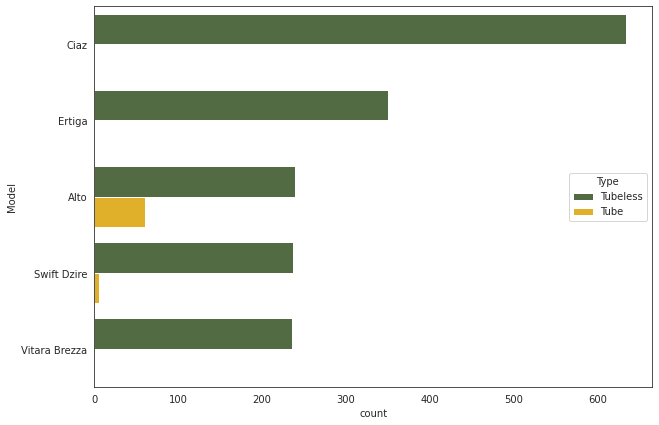

In [83]:
sns.set_style('white')
plt.figure(figsize=(10,7))
sns.countplot(y="Model", hue="Type", data=df, palette=["#50723C","#FFBE0B"],order=df["Model"].value_counts().iloc[:5].index)
plt.show()

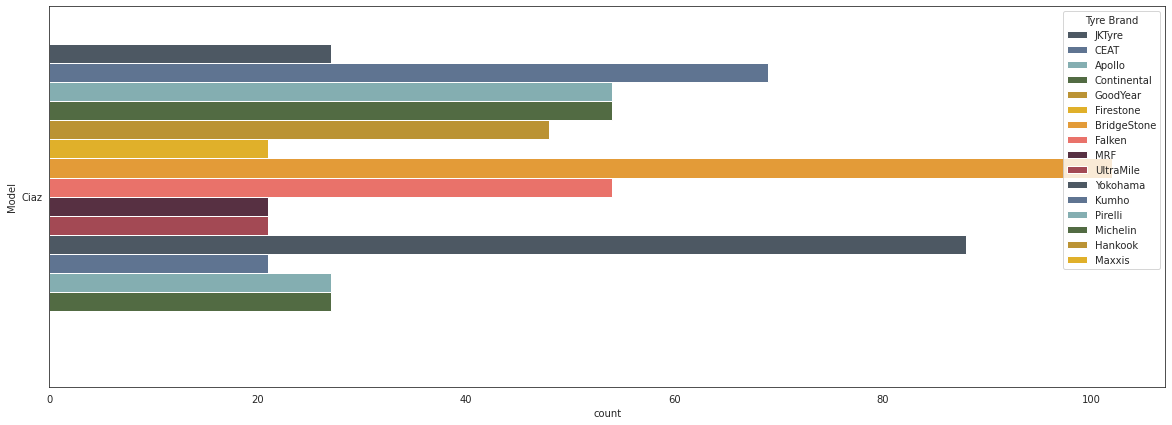

In [84]:
sns.set_style('white')
plt.figure(figsize=(20,7))
sns.countplot(y="Model", hue="Tyre Brand", data=df, palette=colors,order=df["Model"].value_counts().iloc[:1].index)
plt.show()

## 7. Statistical Filtering

In [85]:
round(df.groupby('Tyre Brand')['Rating'].mean().sort_values(ascending=False),1)

Tyre Brand
CEAT           3.4
Michelin       3.3
BridgeStone    3.2
Pirelli        3.0
MRF            2.8
Apollo         2.8
Yokohama       2.3
GoodYear       2.0
JKTyre         1.8
UltraMile      1.7
Falken         1.5
Continental    0.7
Firestone      0.2
Maxxis         0.0
Kumho          0.0
Hankook        0.0
Name: Rating, dtype: float64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4350 entries, 0 to 4349
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           4350 non-null   object 
 1   Model           4350 non-null   object 
 2   Submodel        4350 non-null   object 
 3   Tyre Brand      4350 non-null   object 
 4   Serial No.      4350 non-null   object 
 5   Type            4350 non-null   object 
 6   Load Index      4350 non-null   int64  
 7   Size            4350 non-null   object 
 8   Selling Price   4350 non-null   object 
 9   Original Price  4350 non-null   object 
 10  Rating          4350 non-null   float64
dtypes: float64(1), int64(1), object(9)
memory usage: 374.0+ KB


In [92]:
df["Selling Price"] = df["Selling Price"].str.replace(",","")
df["Original Price"] = df["Original Price"].str.replace(",","")

In [93]:
df["Rating"] = df["Rating"].astype(float)
df["Selling Price"] = df["Selling Price"].astype(float)
df["Original Price"] = df["Original Price"].astype(float)

In [94]:
df_p=df[(df["Rating"]>= 4.0) & (df["Selling Price"]>= 5000)]
df_p.iloc[:5]

,Brand,Model,Submodel,Tyre Brand,Serial No.,Type,Load Index,Size,Selling Price,Original Price,Rating
33,Maruti,Swift Dzire,ZDI (Diesel),Apollo,Amazer 4G Life,Tubeless,88,185/70 R 15,5429.0,5429.0,4.0
34,Maruti,Swift Dzire,ZDI (Diesel),Apollo,Ainac 4G,Tubeless,88,185/70 R 16,5359.0,5359.0,5.0
42,Maruti,Swift Dzire,ZDI (Diesel),Apollo,Ainac 4G,Tubeless,88,185/70 R 24,5359.0,5359.0,5.0
43,Maruti,Swift Dzire,ZDI (Diesel),Apollo,Amazer 4G Life,Tubeless,88,185/70 R 25,5429.0,5429.0,4.0
46,Maruti,Swift Dzire,ZDI (Petrol) New,Apollo,Ainac 4G,Tubeless,88,185/70 R 28,5359.0,5359.0,5.0


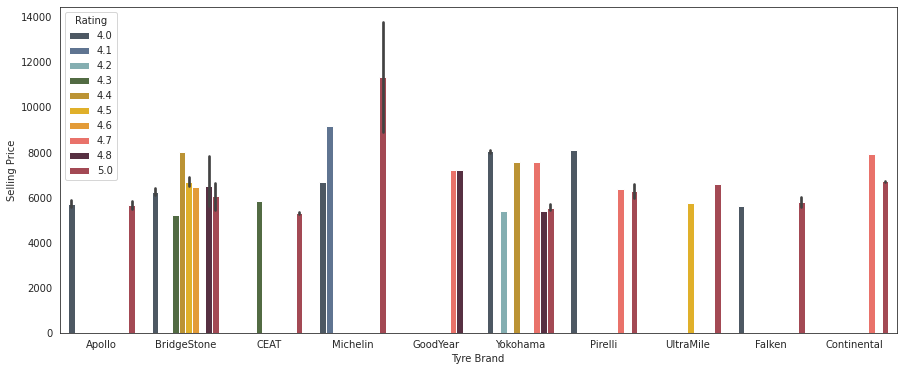

In [95]:
# Rating vs Tyre Brand
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.barplot(y='Selling Price', x='Tyre Brand', data=df_p, hue='Rating',palette=colors)


In [96]:
df.groupby('Tyre Brand')['Selling Price'].mean().sort_values(ascending=False).apply(np.ceil)

Tyre Brand
Pirelli        7359.0
Michelin       6893.0
Maxxis         6232.0
Yokohama       6120.0
Continental    5250.0
BridgeStone    5190.0
Falken         5066.0
Hankook        4980.0
Kumho          4650.0
Apollo         4631.0
UltraMile      4475.0
CEAT           4130.0
GoodYear       4011.0
MRF            3718.0
JKTyre         3602.0
Firestone      3484.0
Name: Selling Price, dtype: float64

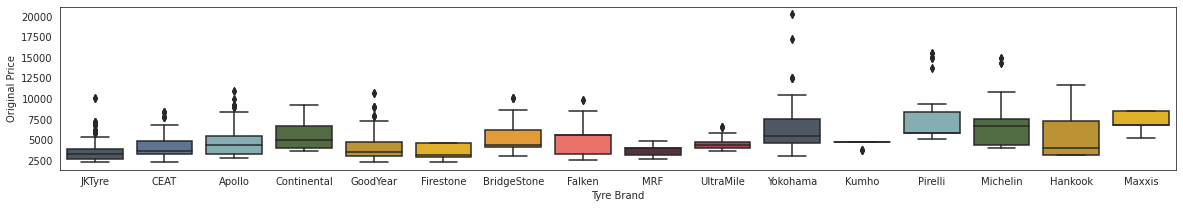

In [97]:
#Box plot to denote average selling prices
fig, ax = plt.subplots(figsize=(20,3))
ax = sns.boxplot(x="Tyre Brand", y="Original Price", data=df, palette=colors)